In [2]:
import os
import glob
import shutil

import ants

print(f"AntsPy version: {ants.__version__}")
BASE_DIR = os.path.dirname(os.path.abspath("__file__"))

AntsPy version: 0.4.2


# Origin

In [3]:
BASE_DIR = os.path.dirname(os.path.abspath("__file__"))
raw_img_path_model = os.path.join(
    BASE_DIR, "second_110_ADNI1_GE_AD_Male_133_MR_MPR__GradWarp__B1_Correction__N3__Scaled_2_Br_subjectID.nii"
)

raw_img_path_model = ants.image_read(raw_img_path_model)

print(raw_img_path_model)

ANTsImage
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (182, 182)
	 Spacing    : (1.0, 1.0)
	 Origin     : (0.0, 0.0)
	 Direction  : [-1.  0.  0. -1.]



In [4]:
raw_img_ants_arr = raw_img_path_model.numpy()

print(f"Type: {type(raw_img_ants_arr)}")
print(f"Shape: {raw_img_ants_arr.shape}")

Type: <class 'numpy.ndarray'>
Shape: (182, 182)


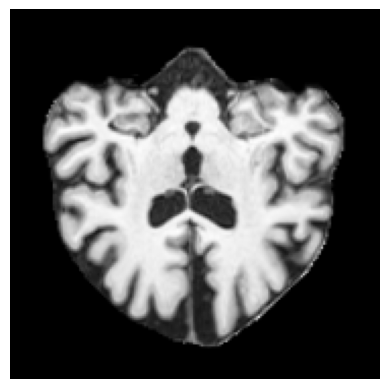

In [5]:
ants.plot(raw_img_path_model, figsize=2, axis=2)

# Stage 1 - Dicom to Nifti

In [6]:
BASE_DIR = os.path.dirname(os.path.abspath("__file__"))
raw_img_path_model = os.path.join(
    BASE_DIR, "data", "preprocess", "ADNI1_T1_All_MRI", "1_step_dicom2nifti", "I7024.nii.gz"
)

raw_img_path_model = ants.image_read(raw_img_path_model)

print(raw_img_path_model)

ANTsImage (LSA)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (160, 192, 192)
	 Spacing    : (1.2, 1.25, 1.25)
	 Origin     : (97.0128, -176.4948, 120.2669)
	 Direction  : [-1.  0.  0.  0.  0.  1.  0. -1.  0.]



In [7]:
raw_img_ants_arr = raw_img_path_model.numpy()

print(f"Type: {type(raw_img_ants_arr)}")
print(f"Shape: {raw_img_ants_arr.shape}")

Type: <class 'numpy.ndarray'>
Shape: (160, 192, 192)


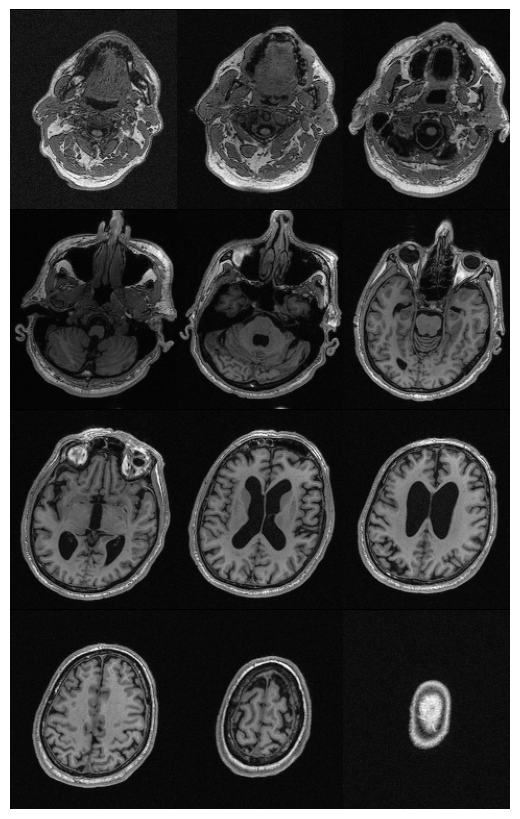

In [8]:
ants.plot(raw_img_path_model, figsize=2, axis=2)

# Stage 2 - Skull Stripping

In [26]:
BASE_DIR = os.path.dirname(os.path.abspath("__file__"))
raw_img_path = os.path.join(
    BASE_DIR, "data", "preprocess", "ADNI1_T1_All_MRI", "2_step_skull_stripping", "I7024.nii.gz"
)

raw_img_path_model = ants.image_read(raw_img_path)

print(raw_img_path_model)

ANTsImage (LSA)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (160, 192, 192)
	 Spacing    : (1.2, 1.25, 1.25)
	 Origin     : (97.0128, -176.4948, 120.2669)
	 Direction  : [-1.  0.  0.  0.  0.  1.  0. -1.  0.]



In [27]:
raw_img_path_model = ants.image_read(raw_img_path, reorient="ASR")
print(raw_img_path_model)

ANTsImage (ASR)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (192, 192, 160)
	 Spacing    : (1.25, 1.25, 1.2)
	 Origin     : (-93.7872, -176.4948, 120.2669)
	 Direction  : [ 0.  0.  1.  1.  0.  0.  0. -1.  0.]



In [10]:
raw_img_ants_arr = raw_img_path_model.numpy()

print(f"Type: {type(raw_img_ants_arr)}")
print(f"Shape: {raw_img_ants_arr.shape}")

Type: <class 'numpy.ndarray'>
Shape: (160, 192, 192)


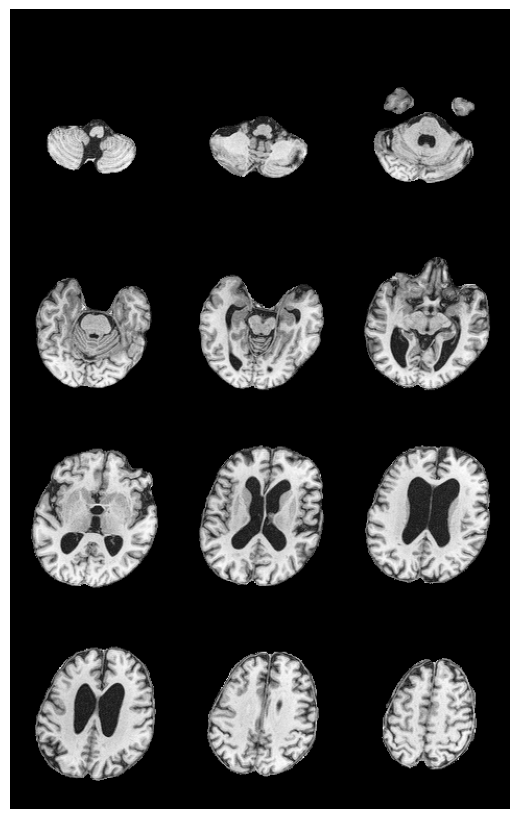

In [11]:
ants.plot(raw_img_path_model, figsize=2, axis=2)

# Stage 3 - Registration

In [21]:
BASE_DIR = os.path.dirname(os.path.abspath("__file__"))
raw_img_path_model = os.path.join(
    BASE_DIR, "data", "preprocess", "ADNI1_T1_All_MRI", "3_step_registration", "I7024.nii.gz"
)

template = os.path.join(
    BASE_DIR, "Preprocessing", "Template", "MNI152_T1_1mm_Brain.nii"
)

raw_img_path_model = ants.image_read(raw_img_path_model, reorient="ASR")
template = ants.image_read(template)


print(raw_img_path_model)

ANTsImage (ASR)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (218, 182, 182)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (-90.0, -91.0, 109.0)
	 Direction  : [-0.  0.  1.  1.  0.  0.  0. -1.  0.]



In [13]:
print(template)

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (182, 218, 182)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (-90.0, 126.0, -72.0)
	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.]



In [15]:
template_arr = template.numpy()

print(f"Type: {type(template_arr)}")
print(f"Shape: {template_arr.shape}")

Type: <class 'numpy.ndarray'>
Shape: (182, 218, 182)


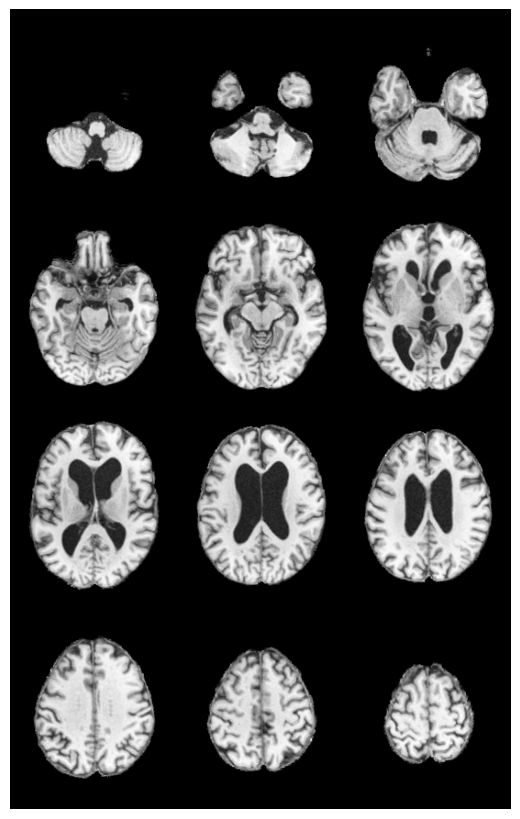

In [16]:
ants.plot(raw_img_path_model, figsize=2, axis=2)

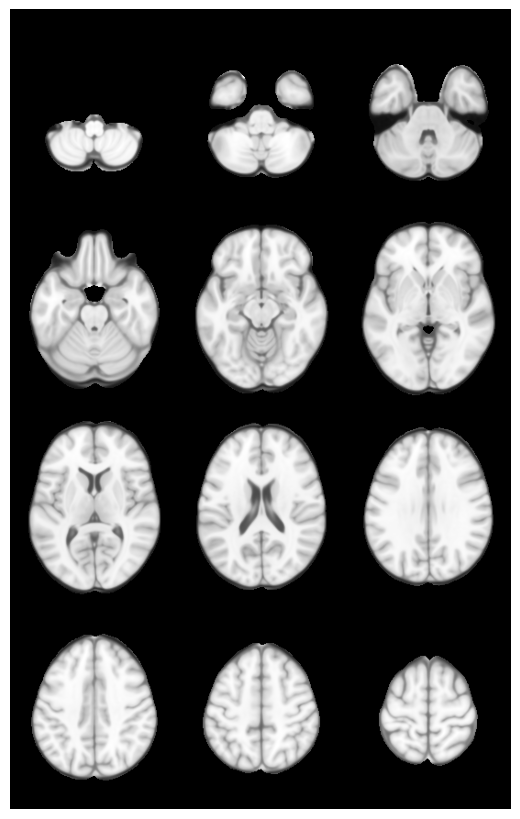

In [17]:
ants.plot(template, figsize=2, axis=2)

# Stage 4 - Relevant Slices

In [18]:
BASE_DIR = os.path.dirname(os.path.abspath("__file__"))
raw_img_path_model = os.path.join(
    BASE_DIR, "data", "preprocess", "ADNI1_T1_All_MRI", "4_step_relevant_slices", "I7024.nii.gz"
)


raw_img_path_model = ants.image_read(raw_img_path_model)

print(raw_img_path_model)

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (32, 182, 182)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]



In [19]:
raw_img_ants_arr = raw_img_path_model.numpy()

print(f"Type: {type(raw_img_ants_arr)}")
print(f"Shape: {raw_img_ants_arr.shape}")

Type: <class 'numpy.ndarray'>
Shape: (32, 182, 182)


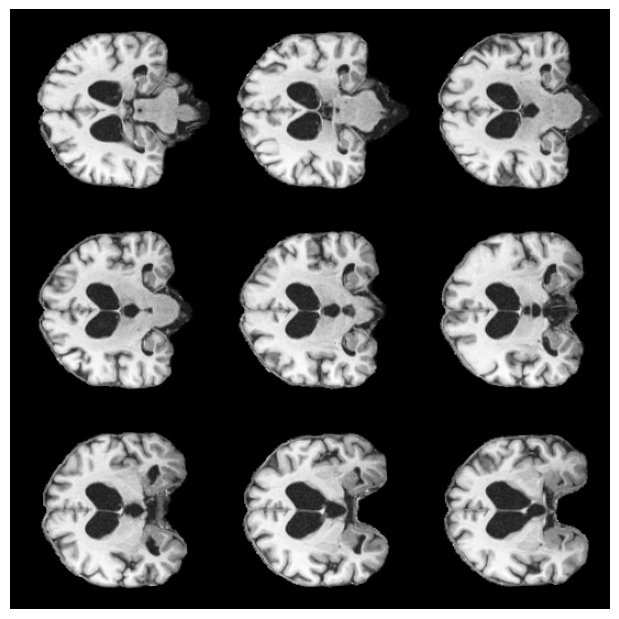

In [20]:
ants.plot(raw_img_path_model, figsize=2, axis=0, slices=[0, 4, 8, 12, 16, 20, 24, 28, 31])